<a href="https://colab.research.google.com/github/alouvre/MLT_DicodingSubmission_Proyek_Akhir_Sistem_Rekomedasi/blob/main/MLT_Submission_Proyek_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir : Sistem Rekomendasi Destinasi Wisata di Indonesia

## **A. Project Overview**

### Latar Belakang

Industri pariwisata merupakan salah satu sektor penting yang mendukung pertumbuhan ekonomi, baik secara lokal maupun global. Seiring berkembangnya teknologi dan meningkatnya akses informasi, wisatawan kini dihadapkan pada banyaknya pilihan destinasi wisata yang tersedia secara daring. Hal ini menciptakan tantangan baru, yaitu kesulitan dalam menentukan destinasi yang paling sesuai dengan preferensi pribadi. Ketika pengguna tidak memiliki informasi atau referensi yang cukup, mereka cenderung memilih tempat yang sudah populer, sehingga mengurangi potensi destinasi lainnya yang tidak kalah menarik namun kurang terekspos `(Yulianto et al., 2023)`.

Untuk mengatasi permasalahan ini, pengembangan sistem rekomendasi destinasi wisata menjadi sangat penting. Sistem ini bertujuan untuk memberikan saran yang relevan dan personalisasi berdasarkan preferensi, riwayat, atau pola perilaku pengguna. Dengan demikian, pengguna tidak perlu menelusuri semua pilihan secara manual, melainkan dapat langsung mendapatkan rekomendasi destinasi yang sesuai dengan keinginan mereka.

Menurut riset yang dilakukan oleh `Goel & Rizvi (2024)`, implementasi sistem rekomendasi menggunakan algoritma hybrid (gabungan content-based filtering dan collaborative filtering) dapat meningkatkan relevansi saran destinasi dan mengurangi cold start problem yang sering terjadi pada sistem rekomendasi berbasis pengguna baru atau item baru.

Penelitian lain yang dilakukan oleh `Syakura (2024)` menunjukkan bahwa sistem rekomendasi destinasi wisata berbasis content-based dapat membantu wisatawan untuk menemukan tempat yang relevan meskipun mereka belum memberikan banyak rating sebelumnya. Sementara itu, sistem berbasis collaborative filtering yang dikembangkan di Semarang terbukti efektif dalam merekomendasikan tempat wisata baru yang belum populer tetapi sesuai dengan pola pengguna lain `(Cholil et al., 2023)`.

Melalui proyek ini, diharapkan sistem yang dibangun tidak hanya mempermudah wisatawan dalam merencanakan perjalanan, tetapi juga memberikan dampak positif bagi sektor pariwisata lokal dengan memperkenalkan lebih banyak destinasi kepada pengguna. Dengan memanfaatkan data dan teknologi, sistem rekomendasi menjadi solusi cerdas dan adaptif di era digital untuk meningkatkan pengalaman wisata yang lebih personal dan efisien.



<br>

📚 Referensi:
- Cholil, S. R., Rizki, N. A., & Hanifah, T. F. (2023). Sistem rekomendasi tempat wisata di Kota Semarang menggunakan metode collaborative filtering. JIKO (Jurnal Informatika dan Komputer), 7(1). [LINK](http://dx.doi.org/10.26798/jiko.v7i1.727)
- Goel, S., & Rizvi, S. W. A. (2024). Travel recommendation system using content and collaborative filtering. Journal of Mechanical and Construction Engineering (JMCE), 4(2), 1–8. [LINK](https://doi.org/10.54060/a2zjournals.jmce.63)
- Syakura, Z. I. (2024). Sistem rekomendasi destinasi wisata di Kota Surabaya menggunakan metode content based filtering dan neural collaborative filtering. Institut Teknologi Sepuluh Nopember Repository. [LINK](http://repository.its.ac.id/id/eprint/114885)
- Yulianto, A., Hadi, W., & Yulianto, Y. (2023). Analisis preferensi wisatawan terhadap pilihan berwisata di Sendang Sombomerti Depok Sleman Yogyakarta. Journal of Tourism and Economic, 6(2), 143-152. [LINK](https://doi.org/10.36594/jtec/tq2fkg11)

## **B. Business Understanding**

### **Problem Statements**

Berdasarkan latar belakang di atas, berikut ini merupakan rincian masalah yang dapat diselesaikan pada proyek ini:
- **Bagaimana cara memberikan rekomendasi destinasi wisata yang relevan berdasarkan deskripsi dan kategori konten?**

    Masalah ini berfokus pada pemanfaatan informasi terkait karakteristik destinasi, seperti kategori (budaya, alam, dll.) dan deskripsi tempat untuk memberikan rekomendasi yang lebih personal dan relevan bagi pengguna. Dengan pendekatan content-based filtering, sistem harus dapat menganalisis dan menyarankan destinasi yang sesuai dengan preferensi pengguna, berdasarkan kesamaan fitur-fitur tersebut.

- **Bagaimana cara menggunakan data rating pengguna untuk meningkatkan akurasi rekomendasi?**

    Data yang berisi interaksi pengguna terhadap destinasi wisata, seperti rating yang diberikan oleh pengguna, sangat penting untuk meningkatkan kualitas rekomendasi. Dengan menggabungkan teknik content-based dan collaborative filtering, sistem dapat mengatasi kekurangan data pada pengguna baru dan memperbaiki akurasi saran yang diberikan. Sistem ini dapat menyesuaikan rekomendasi dengan pola rating yang diberikan oleh pengguna lain dengan preferensi serupa, meningkatkan relevansi rekomendasi yang disarankan.

- **Bagaimana cara mengukur relevansi rekomendasi agar sistem dapat memberikan hasil yang tepat?**

    Sistem rekomendasi harus mampu memberikan hasil yang sesuai dengan kebutuhan pengguna. Oleh karena itu, diperlukan metrik evaluasi yang efektif untuk memantau dan mengukur sejauh mana sistem mampu menghasilkan rekomendasi yang relevan dan tepat sasaran.

### **Goals/Tujuan**

Tujuan utama dari proyek ini adalah untuk membangun sistem rekomendasi destinasi wisata yang relevan dan adaptif dengan memanfaatkan informasi konten destinasi serta interaksi pengguna sebelumnya. Sistem ini diharapkan dapat membantu wisatawan dalam menemukan destinasi yang sesuai dengan preferensi mereka secara lebih efisien, mengurangi ketergantungan pada pencarian manual, serta memperluas eksposur terhadap destinasi yang kurang populer namun potensial.

Secara lebih spesifik, tujuan proyek ini meliputi:
- **Membangun sistem rekomendasi berbasis konten yang efisien dengan memanfaatkan deskripsi dan kategori destinasi wisata.**

    Sistem ini akan memanfaatkan informasi deskriptif dan klasifikasi destinasi untuk mencocokkan rekomendasi dengan minat pengguna yang sudah pernah mengunjungi tempat wisata tertentu.

- **Mengembangkan sistem rekomendasi destinasi wisata berbasis kolaboratif yang mempertimbangkan pola penilaian pengguna.**

    Dengan menganalisis data rating yang diberikan pengguna terhadap destinasi tertentu, sistem diharapkan dapat menyarankan tempat wisata yang relevan berdasarkan kesamaan pola preferensi antar pengguna.

- **Melakukan evaluasi terhadap performa sistem rekomendasi menggunakan metrik yang sesuai.**

    Evaluasi dilakukan untuk menilai tingkat relevansi dan akurasi rekomendasi yang dihasilkan, guna memastikan bahwa sistem memberikan saran yang tepat sasaran dan bermanfaat bagi pengguna.

### **Solution Statement**

Untuk mencapai tujuan proyek, dilakukan serangkaian pendekatan sebagai berikut:

- **Content-based Filtering**

    Pendekatan ini memanfaatkan informasi tekstual pada deskripsi dan kategori destinasi wisata untuk merekomendasikan tempat yang memiliki karakteristik serupa dengan destinasi yang disukai pengguna sebelumnya. Langkah-langkah yang dilakukan adalah sebagai berikut:

    - Preprocessing

    Deskripsi dan kategori destinasi digabungkan dan dibersihkan, lalu diubah menjadi representasi numerik menggunakan metode TF-IDF Vectorizer.

    - Pembangunan Model

    Kesamaan antar destinasi dihitung menggunakan cosine similarity berdasarkan vektor TF-IDF, sehingga sistem dapat merekomendasikan destinasi yang memiliki konten serupa.

    - Evaluasi

    Kinerja sistem diukur menggunakan metrik Precision@10, yang mengevaluasi proporsi destinasi yang relevan dari 10 rekomendasi teratas.

- **Collaborative Filtering**
    
    Pendekatan ini mengandalkan data interaksi pengguna berupa rating untuk menyarankan destinasi yang disukai oleh pengguna lain dengan preferensi serupa. Berikut adalah langkah-langkah yang dilakukan:

    - Encoding Data
      
    ID pengguna dan destinasi dikonversi menjadi indeks numerik untuk mempermudah proses pelatihan dalam model neural network.

    - Normalisasi Rating

    Rating dinormalisasi ke rentang [0,1] guna memastikan stabilitas pembelajaran model.

    - Pembangunan Model

    Model dikembangkan menggunakan embedding layer untuk memetakan pengguna dan destinasi ke dalam representasi vektor, dan menghasilkan prediksi rating untuk pasangan pengguna–destinasi.
    
    - Evaluasi

    Metrik yang digunakan meliputi Root Mean Square Error (RMSE) dan Mean Absolute Error (MAE), yang menilai akurasi prediksi model terhadap rating aktual.

---

## **1. Import Library yang Dibutuhkan**

In [40]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


In [51]:
# ==========================
# 🔗 Mount Google Drive & Navigasi ke Folder Proyek
# ==========================
from google.colab import drive
import os  # Untuk navigasi dan pengelolaan path
import shutil
import zipfile

# ==========================
# ⚙️ Konfigurasi Umum
# ==========================
import pandas as pd
import numpy as np
import random
import warnings

# Konfigurasi warning & seed
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

seed = 0
np.random.seed(seed)
random.seed(seed)

# ==========================
# 📊 Visualization
# ==========================
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# 🧠 Machine Learning & Preprocessing
# ==========================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error

# ==========================
# 🤖 Machine Learning Models
# ==========================
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# ==========================
# 📦 Utility Libraries
# ==========================
# from lazypredict.Supervised import LazyClassifier
from google.colab import files

from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import numpy as np
import joblib

import kagglehub
import shutil
import os

# Mengimpor pustaka untuk pemrosesan teks
from sklearn.feature_extraction.text import TfidfVectorizer  # TfidfVectorizer digunakan untuk mengubah teks menjadi representasi numerik (TF-IDF), berguna untuk analisis teks dan NLP.
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Mengimpor Stemmer dari pustaka Sastrawi, yang digunakan untuk proses stemming (mengubah kata ke bentuk dasar) dalam bahasa Indonesia.
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Mengimpor StopWordRemover dari Sastrawi untuk menghapus stopwords dalam teks bahasa Indonesia.

# Mengimpor pustaka untuk pengukuran kemiripan teks
from sklearn.metrics.pairwise import cosine_similarity  # Cosine similarity digunakan untuk mengukur sejauh mana dua vektor teks serupa satu sama lain.

# Mengimpor pustaka untuk pengukuran kesalahan dalam model regresi
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Digunakan untuk mengukur seberapa baik performa model regresi menggunakan kesalahan kuadrat dan kesalahan absolut rata-rata.

# Mengimpor pustaka untuk deep learning
import tensorflow as tf  # TensorFlow adalah pustaka open-source untuk komputasi numerik dan machine learning, dengan dukungan untuk jaringan saraf dalam.
from tensorflow import keras  # Keras adalah antarmuka tinggi untuk TensorFlow, yang menyediakan API yang lebih mudah digunakan untuk membangun dan melatih model deep learning.
from tensorflow.keras import layers  # Modul layers dari Keras digunakan untuk membangun lapisan-lapisan dalam model deep learning, seperti lapisan Dense, Conv2D, dll.

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Path tujuan proyek di Google Drive
target_path = '/content/drive/MyDrive/MLT/Proyek_Akhir'

# Cek apakah path ada, lalu berpindah ke direktori tersebut
if os.path.exists(target_path):
    os.chdir(target_path)
    print(f"✅ Berhasil berpindah ke direktori: {os.getcwd()}")
else:
    print(f"❌ Path tidak ditemukan: {target_path}. Periksa kembali lokasi foldernya.")

Mounted at /content/drive
✅ Berhasil berpindah ke direktori: /content/drive/MyDrive/MLT/Proyek_Akhir


## **2. Data Understanding**

Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut.

### **2.1. Informasi Dataset**

 Dataset `Indonesia Tourism Destination` yang digunakan pada proyek ini diambil pada laman [Kaggle](https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination/data). Dataset ini ditujukan untuk membangun sistem rekomendasi tempat wisata berdasarkan preferensi pengguna serta parameter seperti kota, harga, kategori, dan waktu. Dataset ini berisi data tempat wisata di `5 kota besar di Indonesia, yaitu Jakarta, Yogyakarta, Semarang, Bandung, dan Surabaya`.

| Jenis      | Keterangan                                                                            |
| ---------- | ------------------------------------------------------------------------------------- |
| Title      | Indonesia Tourism Destination                                                         |
| Source     | [Kaggle](https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination/data) |
| Maintainer | [A_Prabowo](https://www.kaggle.com/datasets/aprabowo)                                 |
| License    | Data files © Original Authors                                                         |
| Visibility | Publik                                                                                |
| Tags       | Beginner, Travel, Asia, Recommender Systems                                           |
| Usability  | 8.24                                                                                  |


### **2.2. Karakteristik Dataset**

Dataset yang digunakan pada proyek ini, yaitu `tourism_with_id.csv` dan `tourism_rating.csv`.

1. `tourism_with_id.csv`
    Berisi informasi detail mengenai tempat wisata di lima kota besar Indonesia. Terdapat total 437 tempat wisata.

    Kolom-kolom pada file ini antara lain:
    - `Place_Id` : Identifikasi unik untuk setiap destinasi wisata.
    - `Place_Name` : Nama destinasi wisata.
    - `Description` : Deskripsi singkat tentang destinasi.
    - `Category` : Kategori destinasi (misalnya: Budaya, Alam).
    - `City` : Kota tempat destinasi berada.
    - `Price` : Harga tiket masuk.
    - `Rating` : Rating rata-rata dari pengguna (0-5).
    - `Time_Minutes` : Waktu yang dibutuhkan untuk mengunjungi (dalam menit).
    - `Coordinate`: Koordinat geografis.
    - `Lat`: Latitude lokasi.
    - `Long` : Longitude lokasi.
    - `Unnamed: 11` : Kolom kosong.
    - `Unnamed: 12` : Nilai duplikat dari Place_id.


2. `tourism_rating.csv`
    Digunakan sebagai data interaksi antara pengguna dan tempat wisata, yang akan digunakan dalam sistem rekomendasi berbasis rating. Terdapat 10.000 data rating pengguna terhadap destinasi wisata tertentu.

    Kolom-kolom pada file ini:
    - `User_Id` : ID unik untuk setiap pengguna yang memberi rating.
    - `Place_Id` : ID untuk setiap destinasi wisata yang diberi rating.
    - `Rating` : Rating yang diberikan oleh pengguna terhadap destinasi wisata (0-5).

**Insight:**
- **Relasi antar dataset**
    - `Place_Id` pada `tourism_rating.csv` berfungsi sebagai foreign key yang menghubungkan ke `Place_Id` pada `tourism_with_id.csv`. Ini memungkinkan integrasi data antara informasi destinasi wisata dengan data interaksi pengguna (rating), sehingga kita bisa menganalisis preferensi pengguna berdasarkan karakteristik destinasi.

- **`User_Id` pada `tourism_rating.csv` memungkinkan kita untuk:**
    - Melakukan analisis perilaku pengguna secara individual, misalnya memahami pola penilaian mereka terhadap berbagai kategori destinasi.
    - Membentuk segmentasi pengguna berdasarkan preferensi, yang bermanfaat untuk personalisasi rekomendasi, misalnya menyarankan destinasi wisata berdasarkan kecenderungan rating pengguna yang mirip.

### **2.3. Mengambil Data Dari Kaggle**

In [ ]:
# Path tujuan akhir di Google Drive
final_dir = "/content/drive/MyDrive/MLT/Proyek_Akhir/dataset"
os.makedirs(final_dir, exist_ok=True)

def download_kaggle_dataset_to_drive(dataset_id: str, target_dir: str):
    try:
        # Unduh dataset ke path default kagglehub
        source_path = kagglehub.dataset_download(dataset_id)
        print(f"✅ Dataset berhasil diunduh: {dataset_id}")
        print(f"📂 Lokasi awal: {source_path}")
        print("🔄 Memindahkan ke folder Google Drive...")

        # Pindahkan isi folder ke target_dir
        for filename in os.listdir(source_path):
            src = os.path.join(source_path, filename)
            dst = os.path.join(target_dir, filename)
            shutil.copy2(src, dst)

        print(f"✅ Dataset berhasil dipindahkan ke: {target_dir}")
        print("📌 Isi folder:", os.listdir(target_dir))

    except Exception as e:
        print(f"❌ Gagal download atau pindah dataset: {dataset_id}")
        print(f"📌 Error: {e}")

# Eksekusi
download_kaggle_dataset_to_drive("aprabowo/indonesia-tourism-destination", final_dir)

✅ Dataset berhasil diunduh: aprabowo/indonesia-tourism-destination
📂 Lokasi awal: /kaggle/input/indonesia-tourism-destination
🔄 Memindahkan ke folder Google Drive...
✅ Dataset berhasil dipindahkan ke: /content/drive/MyDrive/MLT/Proyek_Akhir/dataset
📌 Isi folder: ['user.csv', 'tourism_rating.csv', 'package_tourism.csv', 'tourism_with_id.csv']


### **2.4. Memuat Data**

Dataset diimpor ke dalam lingkungan kerja menggunakan pustaka Pandas dan disusun dalam format dataframe. Proses ini bertujuan untuk memastikan data dapat diakses dan diolah dengan lebih mudah dalam proses analisis selanjutnya.

In [22]:
# Path folder dataset
url = "/content/drive/MyDrive/MLT/Proyek_Akhir/dataset"

# Load keempat dataset ke dalam dataframe dengan nama yang informatif
df_tourism      = pd.read_csv(f"{url}/tourism_with_id.csv")          # Data wisata
df_users        = pd.read_csv(f"{url}/user.csv")                     # Data pengguna
df_ratings      = pd.read_csv(f"{url}/tourism_rating.csv")           # Rating antar user dan tempat
# df_packages     = pd.read_csv(f"{url}/package_tourism.csv")          # Rekomendasi paket

print('Jumlah data informasi tempat wisata:', len(df_tourism.Place_Id.unique()))
print('Jumlah data pengguna ', len(df_users.User_Id.unique()))
print('Jumlah data pengguna yang memberi rating:', len(df_ratings.User_Id.unique()))
print('Jumlah total rating yang tercatat :', len(df_ratings))

Jumlah data informasi tempat wisata: 437
Jumlah data pengguna  300
Jumlah data pengguna yang memberi rating: 300
Jumlah total rating yang tercatat : 10000


In [5]:
df_tourism.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2


In [ ]:
df_ratings.head(2)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2


In [ ]:
df_users.head(2)

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21


### **2.5. Data Assessing**

Pemeriksaan data ini dilakukan dengan menjalankan proses assessing data yang bertujuan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas.

Setelah data berhasil dikumpulkan, dilakukan evaluasi kualitas data melalui beberapa pengecekan penting, yaitu:

- `Duplikasi Data`
    
    Dilakukan pemeriksaan apakah terdapat baris data yang tercatat lebih dari satu kali. Data duplikat dapat memperkenalkan bias dalam pelatihan model dan perlu dihapus.

- `Missing Values`

    Dicek apakah terdapat nilai kosong (missing) pada kolom-kolom penting. Kehadiran nilai kosong dapat menurunkan kualitas model dan, jika ditemukan, perlu ditangani melalui imputasi atau penghapusan.

- `Kolom Yang Tidak Relevan`

    Dilakukan pengecekan apakah terdapat kolom yang memuat informasi yang sama (kolom duplikat), karena keberadaan kolom seperti ini dapat menyebabkan redundansi dan perlu dihapus untuk efisiensi.

#### **2.5.1. Cek Duplikasi Data**

Pertama, dilakukan pemeriksaan untuk memastikan tidak ada duplikasi pada kolom `Place_Id`, karena setiap destinasi wisata seharusnya memiliki ID yang unik.

In [10]:
# Cek duplikat berdasarkan Place_Id
duplicate_place_id = df_tourism[df_tourism.duplicated('Place_Id', keep=False)]

print("Mengecek Duplikat berdasarkan Place_Id:")
duplicate_place_id

Mengecek Duplikat berdasarkan Place_Id:


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12


Selain `Place_Id`, juga perlu diperiksa apakah ada tempat wisata yang tercatat lebih dari sekali berdasarkan nama tempat `(Place_Name)`, yang bisa mengindikasikan duplikasi konten meskipun ID berbeda.

In [11]:
# Cek duplikat berdasarkan Place_Name
duplicate_place_name = df_tourism[df_tourism.duplicated('Place_Name', keep=False)]

print("Mengecek Duplikat berdasarkan Place_Name:")
duplicate_place_name

Mengecek Duplikat berdasarkan Place_Name:


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12


Pada dataset `df_ratings`, dilakukan pengecekan untuk mengetahui apakah ada pengguna `(User_Id)` yang memberi rating lebih dari sekali terhadap destinasi wisata `(Place_Id)` yang sama. Idealnya, setiap kombinasi user dan tempat harus unik.

In [ ]:
# Cek duplikat berdasarkan kombinasi User_Id dan Place_Id
duplicate_user_place = df_ratings[df_ratings.duplicated(['User_Id', 'Place_Id'], keep=False)]

print("Mengecek Duplikat User_Id dan Place_Id:")
duplicate_user_place

Mengecek Duplikat User_Id dan Place_Id:


,User_Id,Place_Id,Place_Ratings
25,1,328,2
29,1,328,2
42,2,437,5
46,2,208,5
47,2,437,4
...,...,...,...
9952,299,290,5
9972,299,407,5
9976,300,69,4
9978,300,69,3


Hasil dari pengecekan menunjukkan bahwa:
- Tidak ditemukan duplikasi pada kolom `Place_Id` di dataset `df_tourism`, sehingga setiap destinasi wisata memiliki ID yang unik.
- Tidak ditemukan duplikasi pada kolom `Place_Name` di dataset `df_tourism`, menandakan bahwa nama destinasi juga tercatat secara unik.
- Pada dataset `df_ratings`, ditemukan sebanyak `798 baris duplikasi` pada kombinasi `User_Id` dan `Place_Id`, yang berarti beberapa pengguna memberikan lebih dari satu rating untuk destinasi yang sama.

#### **2.5.2. Cek Missing Value**

Selanjutnya, kita akan melakukan pemeriksaan terhadap missing values dalam dataset. Nilai yang hilang dapat mempengaruhi hasil analisis maupun kinerja model rekomendasi, sehingga perlu diidentifikasi terlebih dahulu kolom mana saja yang mengandung data kosong.

In [ ]:
# Cek missing values untuk tourism_with_id.csv
print("Nissing values pada tourism_with_id.csv:")
print((df_tourism.isnull().sum()))
print("\n")

# Cek missing values untuk tourism_rating.csv
print("Missing values pada tourism_rating.csv:")
print((df_ratings.isnull().sum()))

Nissing values pada tourism_with_id.csv:
Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64


Missing values pada tourism_rating.csv:
User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64


Hasil dari pengecekan menunjukkan bahwa:
- Pada dataset `df_tourism`, terdapat missing values pada kolom `Time_Minutes` sebanyak 232 baris, dan seluruh baris pada kolom `Unnamed: 11` kosong.
- Sedangkan pada dataset `df_ratings`, tidak ditemukan missing values pada seluruh kolom.

#### **2.5.3. Cek Kolom Yang Tidak Relevan**

Dalam proses evaluasi data, penting untuk mengidentifikasi kolom-kolom yang tidak relevan atau redundan. Kolom yang tidak memuat informasi berguna atau hanya merupakan salinan dari kolom lain dapat menyebabkan redundansi dan memperbesar ukuran dataset secara tidak perlu. Oleh karena itu, perlu dilakukan pemeriksaan lebih lanjut sebelum memutuskan untuk menghapusnya.

Saat meninjau struktur dataset, saya menyadari ada sebuah kolom tambahan bernama `Unnamed: 12` yang tampaknya tidak familiar dan sekilas terlihat mirip dengan `Place_Id`. Hal ini membuat saya penasaran, apakah kolom ini benar-benar memuat informasi baru atau hanya sekadar salinan dari kolom yang sudah ada.

Untuk menjawab rasa penasaran tersebut, saya memutuskan untuk menampilkan kedua kolom tersebut berdampingan.

In [6]:
df_tourism[['Place_Id', 'Unnamed: 12']]

,Place_Id,Unnamed: 12
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
...,...,...
432,433,433
433,434,434
434,435,435
435,436,436


Dapat dilihat bahwa nilai-nilai yang muncul di kedua kolom tersebut tampak identik. Namun, untuk memastikan bahwa semua data benar-benar sama dan tidak ada perbedaan tersembunyi, saya melakukan pengecekan lebih lanjut dengan membandingkan seluruh isi kedua kolom.

In [ ]:
# Cek apakah semua nilai di Place_Id dan Unnamed: 12 sama persis
(df_tourism['Place_Id'] == df_tourism['Unnamed: 12']).all()

np.True_

Hasil dari pengecekan ini menghasilkan `True`, yang berarti seluruh nilai di `Unnamed: 12 memang 100% identik dengan Place_Id`. Dengan demikian, dapat disimpulkan bahwa kolom `Unnamed: 12` tidak memuat informasi baru dan dapat dihapus untuk menjaga kebersihan serta efisiensi data.

#### **2.5.4. Hasil Assessing**

Berdasarkan hasil evaluasi data, diperoleh temuan sebagai berikut:

- Kualitas Duplikasi

  - Dataset `df_tourism`
      
    - Tidak ditemukan data duplikat berdasarkan `Place_Id` maupun `Place_Name`, sehingga `seluruh data destinasi wisata bersifat unik` dan tidak memerlukan proses deduplikasi.

    - Selain itu, dilakukan pengecekan terhadap kolom `Place_Id` dan `Unnamed: 12`. Kolom `Unnamed: 12` memiliki isi yang identik dengan `Place_Id`, sehingga dapat dihapus karena redundan.

  - Dataset `df_ratings`

    Tidak ditemukan data duplikat pada kombinasi `User_Id` dan `Place_Id`. `Setiap pasangan user dan destinasi yang dirating dianggap unik`. Oleh karena itu, tidak diperlukan proses deduplikasi.

- Kualitas Missing Values

  - Dataset `df_tourism`

    Terdapat missing values pada kolom `Time_Minutes` sebanyak 232 baris, serta kolom `Unnamed: 11` yang seluruh isinya kosong (437 baris).

    - Kolom `Unnamed: 11` dapat dihapus karena seluruh data pada kolom ini kosong dan tidak mengandung informasi yang berguna.

    - Missing values pada `Time_Minutes` dapat dihapus Karena terdapat banyak missing values (232 baris) dan informasi waktu kunjungan ini tidak menjadi fokus utama dalam sistem rekomendasi berbasis rating.

  - Dataset `df_ratings`

    Tidak ditemukan missing values di seluruh kolom, sehingga tidak memerlukan langkah tambahan seperti imputasi atau penghapusan data.




## **3. Exploratory Data Analysis**

Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi.

---

### 3.1. EDA - Deskripsi Variabel

#### **Data Tourism**

In [ ]:
# Menampilkan ringkasan informasi dari dataset
df_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


Dari eksekusi method `df_loan.info()` terdapat:

- Terdapat 8 kolom numerik dengan tipe data `int64` dan `float64` yaitu: `Place_Id`, `Price`, `Rating`, `Time_Minutes`, `Lat`, `Long`, `Unnamed: 11`, `Unnamed: 12`.
- Terdapat 5 kolom dengan tipe data `object` yaitu: `Place_Name`, `Description`, `Category`, `City`, `Coordinate`.

In [ ]:
df_tourism.describe(include="all")

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437,437,437,437,437.000000,437.000000,205.000000,437,437.000000,437.000000,0.0,437.000000
unique,NaN,437,437,6,5,NaN,NaN,NaN,437,NaN,NaN,NaN,NaN
top,NaN,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Taman Hiburan,Yogyakarta,NaN,NaN,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",NaN,NaN,NaN,NaN
freq,NaN,1,1,135,126,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
mean,219.000000,NaN,NaN,NaN,NaN,24652.173913,4.442792,82.609756,NaN,-7.095438,109.160142,NaN,219.000000
std,126.295289,NaN,NaN,NaN,NaN,66446.374709,0.208587,52.872339,NaN,0.727241,1.962848,NaN,126.295289
min,1.000000,NaN,NaN,NaN,NaN,0.000000,3.400000,10.000000,NaN,-8.197894,103.931398,NaN,1.000000
25%,110.000000,NaN,NaN,NaN,NaN,0.000000,4.300000,45.000000,NaN,-7.749590,107.578369,NaN,110.000000
50%,219.000000,NaN,NaN,NaN,NaN,5000.000000,4.500000,60.000000,NaN,-7.020524,110.237468,NaN,219.000000
75%,328.000000,NaN,NaN,NaN,NaN,20000.000000,4.600000,120.000000,NaN,-6.829411,110.431869,NaN,328.000000


Fungsi `describe(include="all")` memberikan informasi statistik pada masing-masing kolom, antara lain:
- `Count` adalah jumlah nilai non-null (tidak kosong) pada kolom tersebut. Berlaku untuk semua jenis data.
- `Mean` adalah nilai rata-rata. Hanya muncul pada kolom bertipe numerik.
- `Std` adalah standar deviasi (seberapa tersebar data dari rata-rata). Hanya muncul untuk kolom numerik.
- `Min` yaitu nilai minimum dari setiap kolom numerik.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- `75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum pada kolom numerik.
- `Unique` adalah	jumlah nilai unik (berbeda) dalam kolom. Hanya muncul untuk kolom kategorikal/objek.
- `Top` adalah nilai yang paling sering muncul (modus) dalam kolom kategorikal.
- `Freq` adalah frekuensi kemunculan nilai top. Berapa kali nilai tersebut muncul.

In [ ]:
df_tourism.shape

(437, 13)

Dari eksekusi method `df_tourism.shape` Terlihat:

| JUMLAH BARIS AWAL | JUMLAH KOLOM AWAL |
| ------ | ------ |
| 437 | 13 |

<br>

#### **Data User**

In [ ]:
# Menampilkan ringkasan informasi dari dataset
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


Dari eksekusi method `df_loan.info()` terdapat:

- Terdapat 2 kolom numerik dengan tipe data `int64` dan `float64` yaitu: `User_Id` dan `Age`.
- Terdapat 1 kolom dengan tipe data `object` yaitu: `Location`.

In [ ]:
df_users.describe(include="all")

,User_Id,Location,Age
count,300.000000,300,300.000000
unique,NaN,28,NaN
top,NaN,"Bekasi, Jawa Barat",NaN
freq,NaN,39,NaN
mean,150.500000,NaN,28.700000
std,86.746758,NaN,6.393716
min,1.000000,NaN,18.000000
25%,75.750000,NaN,24.000000
50%,150.500000,NaN,29.000000
75%,225.250000,NaN,34.000000


Fungsi `describe(include="all")` memberikan informasi statistik pada masing-masing kolom, antara lain:
- `Count` adalah jumlah nilai non-null (tidak kosong) pada kolom tersebut. Berlaku untuk semua jenis data.
- `Mean` adalah nilai rata-rata. Hanya muncul pada kolom bertipe numerik.
- `Std` adalah standar deviasi (seberapa tersebar data dari rata-rata). Hanya muncul untuk kolom numerik.
- `Min` yaitu nilai minimum dari setiap kolom numerik.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- `75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum pada kolom numerik.
- `Unique` adalah	jumlah nilai unik (berbeda) dalam kolom. Hanya muncul untuk kolom kategorikal/objek.
- `Top` adalah nilai yang paling sering muncul (modus) dalam kolom kategorikal.
- `Freq` adalah frekuensi kemunculan nilai top. Berapa kali nilai tersebut muncul.

In [ ]:
df_users.shape

(300, 3)

Dari eksekusi method `df_tourism.shape` Terlihat:

| JUMLAH BARIS AWAL | JUMLAH KOLOM AWAL |
| ------ | ------ |
| 300 | 3 |

<br>

#### **Data Rating**

In [ ]:
# Menampilkan ringkasan informasi dari dataset
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


Dari eksekusi method `df_loan.info()` terdapat:

- Terdapat 3 kolom numerik dengan tipe data `int64` dan `float64` yaitu: `User_Id`, `Place_Id`, dan `Place_Ratings`.

In [ ]:
df_ratings.describe(include="all")

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


Fungsi `describe(include="all")` memberikan informasi statistik pada masing-masing kolom, antara lain:
- `Count` adalah jumlah nilai non-null (tidak kosong) pada kolom tersebut. Berlaku untuk semua jenis data.
- `Mean` adalah nilai rata-rata. Hanya muncul pada kolom bertipe numerik.
- `Std` adalah standar deviasi (seberapa tersebar data dari rata-rata). Hanya muncul untuk kolom numerik.
- `Min` yaitu nilai minimum dari setiap kolom numerik.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- `75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum pada kolom numerik.
- `Unique` adalah	jumlah nilai unik (berbeda) dalam kolom. Hanya muncul untuk kolom kategorikal/objek.
- `Top` adalah nilai yang paling sering muncul (modus) dalam kolom kategorikal.
- `Freq` adalah frekuensi kemunculan nilai top. Berapa kali nilai tersebut muncul.

In [ ]:
# Menampilkan jumlah duplikasi sebelum dihapus
print("Jumlah Duplikasi Sebelum Dihapus:", df_ratings.duplicated().sum())

# Menghapus duplikasi
df_ratings = df_ratings.drop_duplicates()

# Menampilkan jumlah duplikasi setelah dihapus
print("Jumlah Duplikasi Setelah Dihapus:", df_ratings.duplicated().sum())

Jumlah Duplikasi Sebelum Dihapus: 79
Jumlah Duplikasi Setelah Dihapus: 0


In [ ]:
df_ratings.shape

(9921, 3)

Dari eksekusi method `df_tourism.shape` Terlihat:

| JUMLAH BARIS AWAL | JUMLAH KOLOM AWAL |
| ------ | ------ |
| 9921 | 3 |

<br>

### 3.2. Univariate Analysis

#### Categorical Features

In [ ]:
def plot_kategori(df, feature, warna='purple'):
    """
    Menampilkan jumlah dan persentase kategori serta plot batang dari suatu kolom kategorikal.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    feature (str): Nama kolom kategorikal.
    warna (str): Warna untuk bar chart (default = 'orange').
    """
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)
    df_summary = pd.DataFrame({
        'Jumlah Sampel': count,
        'Persentase (%)': percent.round(1)
    })

    print(f"\nRingkasan untuk kolom: {feature}")
    print(df_summary)
    print("\n")

    print("Visualisasi:")
    count.plot(kind='bar', title=feature, color=warna)
    plt.ylabel("Jumlah")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### **Fitur 1 - Category**


Ringkasan untuk kolom: Category
                    Jumlah Sampel  Persentase (%)
Category                                         
Taman Hiburan                 135            30.9
Budaya                        117            26.8
Cagar Alam                    106            24.3
Bahari                         47            10.8
Tempat Ibadah                  17             3.9
Pusat Perbelanjaan             15             3.4


Visualisasi:


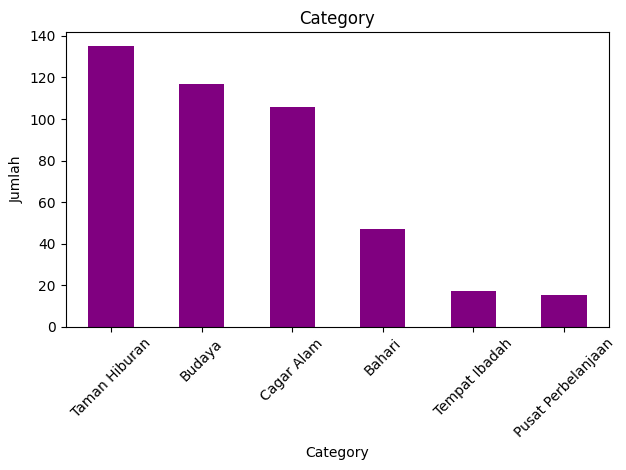

In [ ]:
plot_kategori(df_tourism, 'Category')

##### **Fitur 2 - City**


Ringkasan untuk kolom: City
            Jumlah Sampel  Persentase (%)
City                                     
Yogyakarta            126            28.8
Bandung               124            28.4
Jakarta                84            19.2
Semarang               57            13.0
Surabaya               46            10.5


Visualisasi:


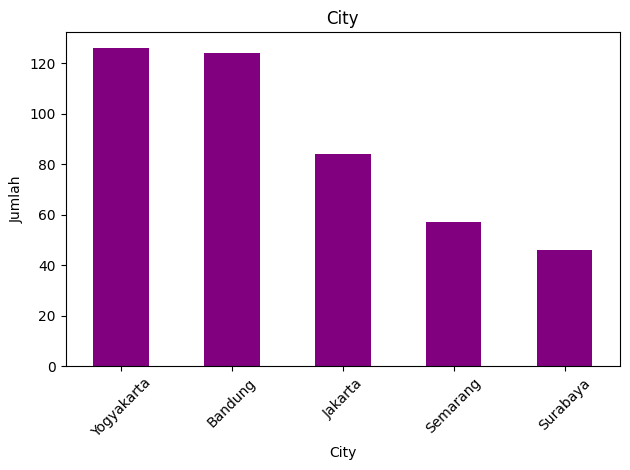

In [ ]:
plot_kategori(df_tourism, 'City')

##### **Fitur 3 - Place_Name**


 Ringkasan 10 Tempat Wisata dengan Rating Terbanyak:
                                  Place_Name  Rating_Count  Persentase (%)
0                             Gunung Lalakon            39             0.4
1                        Pantai Parangtritis            39             0.4
2  Gereja Perawan Maria Tak Berdosa Surabaya            38             0.4
3                             Pantai Kesirat            37             0.4
4                         Taman Sungai Mudal            36             0.4
5                    Kampung Batu Malakasari            34             0.3
6              Geoforest Watu Payung Turunan            34             0.3
7                            Grand Maerakaca            33             0.3
8                                 Taman Film            33             0.3
9                       NuArt Sculpture Park            33             0.3




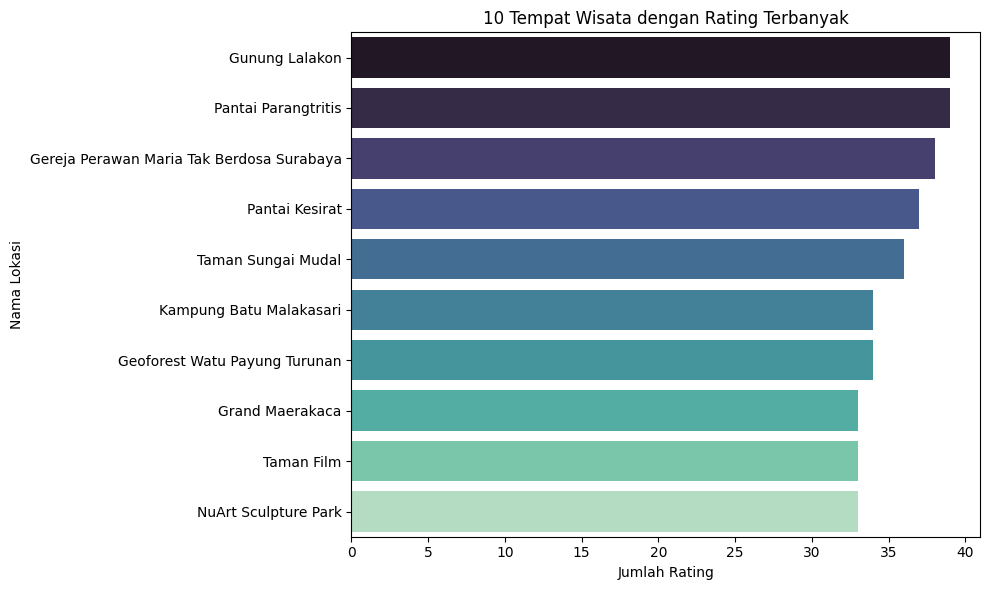

In [20]:
# Hitung jumlah rating untuk setiap Place_Id
top_10 = df_ratings['Place_Id'].value_counts().reset_index()[0:10]
# Ganti nama kolom biar jelas
top_10.columns = ['Place_Id', 'Rating_Count']
# Gabungkan dengan nama tempat dari df_tourism
top_10 = pd.merge(top_10, df_tourism[['Place_Id', 'Place_Name']], on='Place_Id', how='left')

# Hitung persentase
total_rating = df_ratings['Place_Id'].count()
top_10['Persentase (%)'] = round(100 * top_10['Rating_Count'] / total_rating, 1)

# Tampilkan ringkasan
print("\n Ringkasan 10 Tempat Wisata dengan Rating Terbanyak:")
print(top_10[['Place_Name', 'Rating_Count', 'Persentase (%)']])
print("\n")

# Visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(10,6))
sns.barplot(x='Rating_Count', y='Place_Name', data=top_10, palette='mako')
plt.title('10 Tempat Wisata dengan Rating Terbanyak')
plt.xlabel('Jumlah Rating')
plt.ylabel('Nama Lokasi')
plt.tight_layout()
plt.show()

#### Numerical Features

##### **Fitur 1 - Rating**


Ringkasan untuk kolom: Rating
        Jumlah Sampel  Persentase (%)
Rating                               
4.5                98            22.4
4.4                98            22.4
4.6                75            17.2
4.3                47            10.8
4.7                37             8.5
4.2                20             4.6
4.1                20             4.6
4.0                18             4.1
4.8                10             2.3
5.0                 4             0.9
4.9                 4             0.9
3.9                 3             0.7
3.8                 2             0.5
3.4                 1             0.2


Visualisasi:


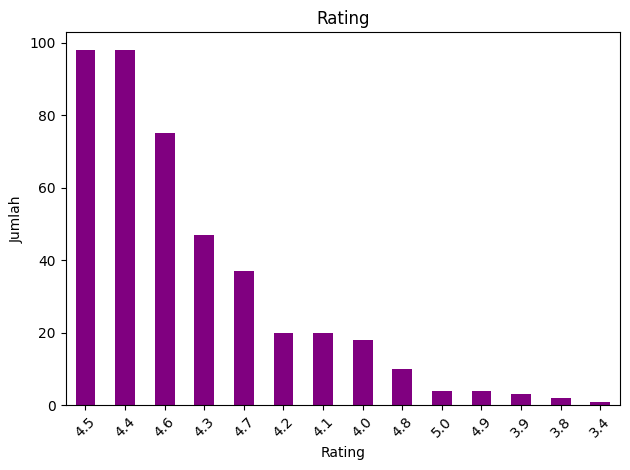

In [ ]:
plot_kategori(df_tourism, 'Rating')

##### **Analisis Distribusi Fitur Numerik**

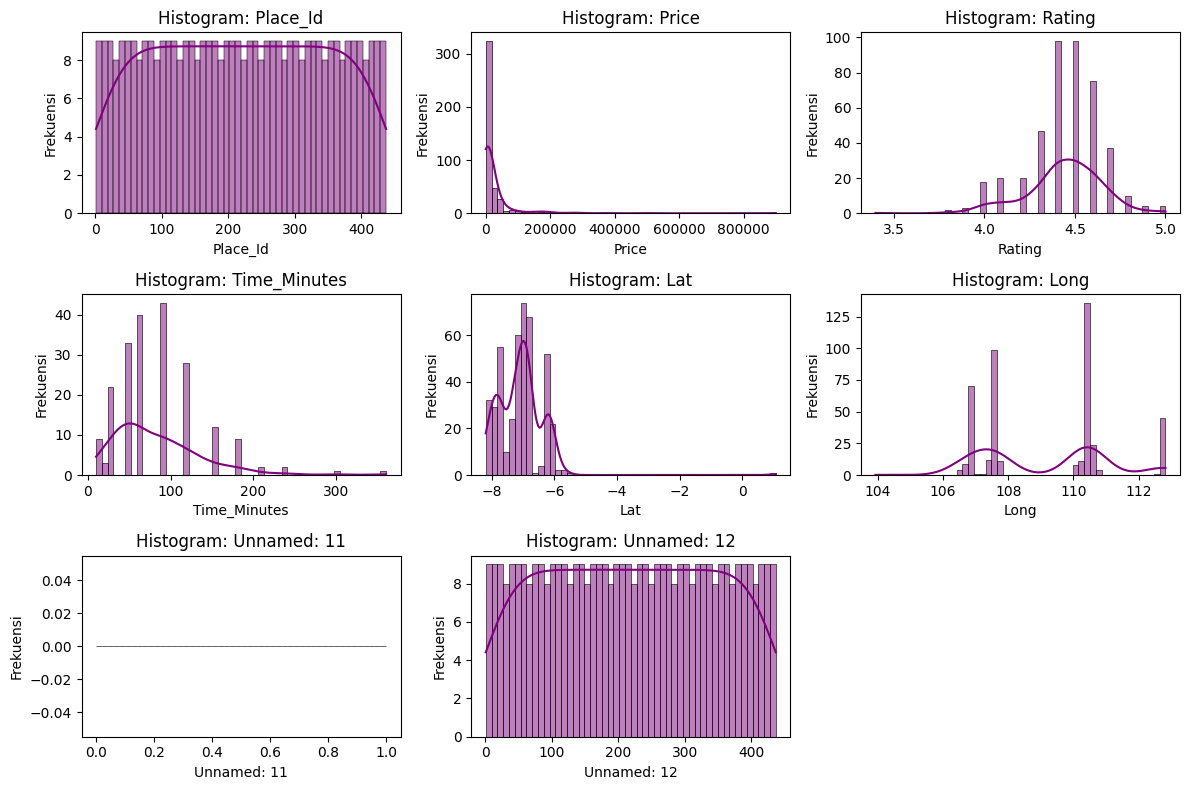

In [7]:
def plot_histogram_semua_kolom(df, bins=50, figsize=(12, 8), color='purple'):
    """
    Menampilkan histogram dari semua kolom numerik di dalam dataframe menggunakan seaborn.histplot.

    Parameters:
    df (DataFrame): DataFrame yang akan diplot.
    bins (int): Jumlah bin pada histogram.
    figsize (tuple): Ukuran figure.
    color (str): Warna histogram.
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    n_cols = len(numeric_cols)
    n_rows = (n_cols + 2) // 3  # 3 kolom per baris

    plt.figure(figsize=figsize)
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, 3, i)
        sns.histplot(df[col], bins=bins, kde=True, color=color)
        plt.title(f'Histogram: {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
        plt.tight_layout()
    plt.show()

plot_histogram_semua_kolom(df_tourism)

## **4. Data Preparation**

Pada tahap data preparation, dilakukan serangkaian langkah untuk memastikan bahwa data yang digunakan dalam proses pemodelan bersih, terstruktur, dan siap untuk dianalisis. Tahapan ini mencakup pembersihan data, penggabungan dataset, pengolahan teks, encoding variabel kategorikal, normalisasi rating, dan pembagian data menjadi set pelatihan dan pengujian.

### 4.1. Menghapus Kolom Yang Tidak Diperlukan

In [27]:
# Membuang kolom yang tidak dipakai
df_tourism_cleaned = df_tourism.drop(['City', 'Price', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12'],axis=1)

# Menampilkan daftar kolom setelah penghapusan untuk memverifikasi bahwa kolom-kolom yang tidak diperlukan telah dihapus
print("\nKolom setelah penghapusan:")
df_tourism_cleaned.columns


Kolom setelah penghapusan:


Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'Rating'], dtype='object')

### 4.2. Menggabungkan Dataset

In [ ]:
# Menggabungkan dataset rating dengan dataset destinasi wisata
# Tujuannya untuk membentuk dataset rekomendasi berbasis rata-rata rating setiap destinasi.

df_recommendation = pd.merge(
    # Hitung rata-rata rating untuk setiap destinasi berdasarkan 'Place_Id'.
    df_ratings.groupby('Place_Id')['Place_Ratings'].mean().reset_index(),

    # Gabungkan dengan data destinasi wisata yang sudah dibersihkan.
    df_tourism_cleaned,

    # Lakukan penggabungan berdasarkan kolom 'Place_Id' yang sama di kedua dataset.
    on='Place_Id'
)

In [32]:
# Cek jumlah string kosong pada kolom 'Description' dan 'Category'
empty_description = (df_recommendation['Description'].str.strip() == '').sum()
empty_category = (df_recommendation['Category'].str.strip() == '').sum()

# Tangani missing values hanya jika memang ada NaN
if df_recommendation['Description'].isnull().any():
    df_recommendation['Description'] = df_recommendation['Description'].fillna('')

if df_recommendation['Category'].isnull().any():
    df_recommendation['Category'] = df_recommendation['Category'].fillna('')


print(f"Jumlah string kosong pada kolom 'Description': {empty_description}")
print(f"Jumlah string kosong pada kolom 'Category': {empty_category}")

Jumlah string kosong pada kolom 'Description': 0
Jumlah string kosong pada kolom 'Category': 0


In [35]:
# Cek apakah ada destinasi dengan 'Place_Name' yang sama (duplikat) setelah penggabungan.
if df_recommendation['Place_Name'].duplicated().any():
    print("Peringatan: Terdapat 'Place_Name' yang duplikat.")

# Tampilkan beberapa baris pertama dari dataset hasil penggabungan untuk memverifikasi hasilnya.
print("\nData Rekomendasi setelah penggabungan (Train Data):")
display(df_recommendation)


Data Rekomendasi setelah penggabungan (Train Data):


,Place_Id,Place_Ratings,Place_Name,Description,Category,Rating
0,1,3.722222,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,4.6
1,2,2.840000,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,4.6
2,3,2.526316,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,4.6
3,4,2.857143,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,4.5
4,5,3.520000,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,4.5
...,...,...,...,...,...,...
432,433,3.304348,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,4.4
433,434,2.400000,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,4.6
434,435,3.000000,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,4.4
435,436,3.090909,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,4.6


### 4.3. Persiapan Data Content Based Filtering

Sebelum membangun sistem rekomendasi berbasis konten (Content-Based Filtering), diperlukan beberapa tahap preprocessing dan transformasi data agar data siap digunakan dalam model. Adapun tahapan persiapan data yang dilakukan meliputi:

- Preprocessing Teks
    
    Untuk mendapatkan representasi teks yang lebih bersih dan bermakna, dilakukan beberapa langkah pembersihan data:
    - Penggabungan Fitur: Menggabungkan informasi dari kolom deskripsi dan kategori destinasi wisata menjadi satu kolom teks baru untuk memperkaya konteks.
    - Normalisasi Teks: Mengubah seluruh teks menjadi huruf kecil (lowercase) agar seragam.
    - Stemming dan Stopword Removal: Menggunakan library Sastrawi untuk menghilangkan kata-kata umum yang tidak bermakna (stopwords) dan mengembalikan kata ke bentuk dasarnya (stemming), sehingga meminimalkan variasi kata yang tidak perlu.

- Vektorisasi Teks

    Setelah preprocessing, teks diubah menjadi representasi numerik menggunakan metode TF-IDF Vectorizer. Teknik ini bertujuan untuk mengukur seberapa penting sebuah kata dalam satu destinasi wisata dibandingkan dengan seluruh destinasi lain, sehingga memungkinkan model mengenali fitur unik dari masing-masing destinasi.

- Perhitungan Similarity
    
    Dengan teks yang telah dalam bentuk vektor TF-IDF, dilakukan perhitungan cosine similarity antar destinasi wisata. Cosine similarity mengukur tingkat kemiripan antara dua vektor, sehingga destinasi yang memiliki karakteristik serupa akan memiliki nilai similarity yang lebih tinggi.

#### Preprocessing Text

In [42]:
# Menginisialisasi objek stemmer dan stopword remover dari pustaka Sastrawi

stemmer = StemmerFactory().create_stemmer()  # Untuk melakukan stemming
stopword = StopWordRemoverFactory().create_stop_word_remover()  # Untuk menghapus stopwords

In [45]:
%%time

def preprocessing(text):
    """
    Melakukan preprocessing teks dengan mengubah ke lowercase, stemming, dan menghapus stopwords.

    Parameters:
    - text (str): Teks yang akan diproses.

    Returns:
    - str: Teks yang telah diproses.
    """
    text = text.lower()  # Mengubah semua huruf menjadi lowercase
    text = stemmer.stem(text)  # Melakukan stemming untuk mengubah kata ke bentuk dasar
    text = stopword.remove(text)  # Menghapus stopwords dari teks
    return text

# Menggabungkan kolom 'Description' dan 'Category' menjadi satu kolom 'Tags'
df_recommendation['Tags'] = df_recommendation['Description'] + ' ' + df_recommendation['Category']

# Menerapkan preprocessing pada kolom 'Tags'
df_recommendation['Tags'] = df_recommendation['Tags'].apply(preprocessing)

CPU times: user 5min 38s, sys: 597 ms, total: 5min 38s
Wall time: 5min 54s


In [47]:
df_recommendation.head()

,Place_Id,Place_Ratings,Place_Name,Description,Category,Rating,Tags
0,1,3.722222,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,4.6,monumen nasional populer singkat monas tugu mo...
1,2,2.840000,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,4.6,kota tua jakarta juga nama kota tua pusat alun...
2,3,2.526316,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,4.6,dunia fantasi sebut dufan tempat hibur letak k...
3,4,2.857143,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,4.5,taman mini indonesia indah rupa suatu kawasan ...
4,5,3.520000,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,4.5,atlantis water adventure kenal atlantis ancol ...


In [48]:
%%time

# Preprocessing pada kolom 'Description' saja dan menyimpannya dalam kolom 'Description_Preprocessed'
df_recommendation['Description_Preprocessed'] = df_recommendation['Description'].apply(preprocessing)

df_recommendation.head()

CPU times: user 140 ms, sys: 0 ns, total: 140 ms
Wall time: 145 ms


,Place_Id,Place_Ratings,Place_Name,Description,Category,Rating,Tags,Description_Preprocessed
0,1,3.722222,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,4.6,monumen nasional populer singkat monas tugu mo...,monumen nasional populer singkat monas tugu mo...
1,2,2.840000,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,4.6,kota tua jakarta juga nama kota tua pusat alun...,kota tua jakarta juga nama kota tua pusat alun...
2,3,2.526316,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,4.6,dunia fantasi sebut dufan tempat hibur letak k...,dunia fantasi sebut dufan tempat hibur letak k...
3,4,2.857143,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,4.5,taman mini indonesia indah rupa suatu kawasan ...,taman mini indonesia indah rupa suatu kawasan ...
4,5,3.520000,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,4.5,atlantis water adventure kenal atlantis ancol ...,atlantis water adventure kenal atlantis ancol ...


#### **TF-IDF Vectorizer**

Pada tahap ini, kita akan membangun sistem rekomendasi sederhana berdasarkan deskripsi dan kategori destinasi wisata. Untuk itu, digunakan TF-IDF Vectorizer untuk mengubah teks (seperti deskripsi dan kategori destinasi) menjadi vektor numerik. Ini memperhitungkan frekuensi kata dalam dokumen dan pentingnya kata di seluruh kumpulan dokumen.

TF-IDF Vectorizer bekerja dengan prinsip berikut:
- Term Frequency (TF): Mengukur seberapa sering sebuah kata muncul dalam suatu dokumen (semakin sering muncul, semakin penting kata tersebut dalam dokumen tersebut).
- Inverse Document Frequency (IDF): Memberikan bobot lebih rendah kepada kata-kata yang sering muncul di banyak dokumen (kata umum), sehingga fokus tetap pada kata-kata yang lebih unik.

Dengan pendekatan ini, kita dapat menangkap fitur penting dari setiap kategori destinasi dan mengukur tingkat kemiripan antar destinasi untuk keperluan rekomendasi.

In [38]:
# mempertimbangkan n-gram dari 1 hingga 2, dan hanya memasukkan kata yang muncul lebih dari sekali (min_df=2)
# Menginisialisasi TfidfVectorizer untuk kolom 'Tags' (menggabungkan Deskripsi dan Kategori)
tv_tags = TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=2)

# Menginisialisasi TfidfVectorizer untuk kolom 'Description' dengan konfigurasi yang sama
tv_desc = TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=2)

In [49]:
# Vektorisasi teks pada kolom 'Tags' menggunakan TfidfVectorizer
vectors_tags = tv_tags.fit_transform(df_recommendation['Tags'])

# Vektorisasi teks pada kolom 'Description_Preprocessed' menggunakan TfidfVectorizer
vectors_desc = tv_desc.fit_transform(df_recommendation['Description'])

In [57]:
vectors_tags.shape

(437, 5000)

In [58]:
vectors_desc.shape

(437, 5000)

#### Cosine Similarity

In [52]:
# Menghitung Cosine Similarity antara vektor-vektor 'Tags' untuk menghitung kemiripan antar destinasi berdasarkan tags
similarity_tags = cosine_similarity(vectors_tags, dense_output=False)

# Menghitung Cosine Similarity antara vektor-vektor 'Description' untuk menghitung kemiripan antar destinasi berdasarkan deskripsi
similarity_desc = cosine_similarity(vectors_desc, dense_output=False)

### 4.4. Persiapan Data Collaborative Filtering

In [72]:
# Mendapatkan daftar unik User_Id dan Place_Id
user_ids = df_ratings['User_Id'].unique().tolist()
place_ids = df_ratings['Place_Id'].unique().tolist()

print('list User_Id: ', user_ids)
print('list Place_Id: ', place_ids)

list User_Id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

#### Encoding User_Id dan Place_Id

In [74]:
# Melakukan encoding User_Id
user_to_user_encoded = {user_id: idx for idx, user_id in enumerate(user_ids)}
# Membuat mapping dictionary untuk User_Id
user_encoded_to_user = {idx: user_id for idx, user_id in enumerate(user_ids)}

# Melakukan encoding Place_Id
place_to_place_encoded = {place_id: idx for idx, place_id in enumerate(place_ids)}
# Membuat mapping dictionary untuk Place_Id
place_encoded_to_place = {idx: place_id for idx, place_id in enumerate(place_ids)}

print('encoded angka ke User_Id: ', user_encoded_to_user)
print('encoded angka ke Place_Id: ', place_encoded_to_place)

encoded angka ke User_Id:  {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49, 49: 50, 50: 51, 51: 52, 52: 53, 53: 54, 54: 55, 55: 56, 56: 57, 57: 58, 58: 59, 59: 60, 60: 61, 61: 62, 62: 63, 63: 64, 64: 65, 65: 66, 66: 67, 67: 68, 68: 69, 69: 70, 70: 71, 71: 72, 72: 73, 73: 74, 74: 75, 75: 76, 76: 77, 77: 78, 78: 79, 79: 80, 80: 81, 81: 82, 82: 83, 83: 84, 84: 85, 85: 86, 86: 87, 87: 88, 88: 89, 89: 90, 90: 91, 91: 92, 92: 93, 93: 94, 94: 95, 95: 96, 96: 97, 97: 98, 98: 99, 99: 100, 100: 101, 101: 102, 102: 103, 103: 104, 104: 105, 105: 106, 106: 107, 107: 108, 108: 109, 109: 110, 110: 111, 111: 112, 112: 113, 113: 114, 114: 115, 115: 116, 116: 117, 117: 118, 118: 119, 

#### Menyiapkan Data Setelah Encoding

In [75]:
# Membuat salinan dataset dan menambahkan kolom encoded
df_collaborative = df_ratings.copy()
df_collaborative['user'] = df_collaborative['User_Id'].map(user_to_user_encoded)
df_collaborative['place'] = df_collaborative['Place_Id'].map(place_to_place_encoded)

# Menyimpan jumlah user dan jumlah tempat
num_users = len(user_to_user_encoded)
num_places = len(place_encoded_to_place)

print("Jumlah User:", num_users)
print("Jumlah Destinasi wisata:", num_places)

Jumlah User: 300
Jumlah Destinasi wisata: 437


#### Normalisasi Rating

In [77]:
# Menentukan nilai minimum dan maksimum rating
min_rating = df_collaborative['Place_Ratings'].min()
max_rating = df_collaborative['Place_Ratings'].max()

# Melakukan normalisasi rating ke rentang [0, 1]
df_collaborative['normalized_rating'] = df_collaborative['Place_Ratings'].apply(
    lambda x: (x - min_rating) / (max_rating - min_rating)
)

df_collaborative.head(2)

,User_Id,Place_Id,Place_Ratings,user,place,normalized_rating
0,1,179,3,0,0,0.50
1,1,344,2,0,1,0.25


#### Membagi Data Menjadi Training dan Validation Set

In [67]:
# Menentukan ukuran training set (80% data)
train_size_cf = int(0.8 * len(df_collaborative))

# Membagi fitur (user, place) dan target (normalized_rating)
x_train_cf = df_collaborative[['user', 'place']].values[:train_size_cf]
y_train_cf = df_collaborative['normalized_rating'].values[:train_size_cf]

x_val_cf = df_collaborative[['user', 'place']].values[train_size_cf:]
y_val_cf = df_collaborative['normalized_rating'].values[train_size_cf:]

## **5. Model Development**

### **Model Content Based Filtering**

In [60]:
def get_content_based_recommendations(place_name, data, similarity_matrix, top_n=10):
    """
    Menghasilkan rekomendasi destinasi wisata menggunakan Content-Based Filtering.

    Rekomendasi didasarkan pada kemiripan antara destinasi wisata yang dipilih dengan destinasi lainnya,
    menggunakan matriks similarity yang telah dihitung sebelumnya.

    Parameters:
    - place_name (str): Nama destinasi wisata yang dijadikan acuan rekomendasi.
    - data (DataFrame): Dataset yang berisi informasi destinasi wisata.
    - similarity_matrix (ndarray): Matriks similarity antar destinasi wisata.
    - top_n (int): Jumlah destinasi rekomendasi yang ingin ditampilkan (default = 10).

    Returns:
    - list: Daftar Place_Id destinasi wisata yang direkomendasikan.
    """
    # Memastikan destinasi yang diminta ada dalam dataset
    if place_name not in data['Place_Name'].values:
        print(f"'{place_name}' tidak ditemukan dalam dataset.")
        return []

    # Mendapatkan indeks destinasi dalam dataset
    place_idx = data[data['Place_Name'] == place_name].index[0]

    # Mendapatkan skor similarity untuk destinasi tersebut
    place_similarity = similarity_matrix[place_idx].toarray().flatten()

    # Mengurutkan skor similarity secara menurun
    similar_indices = place_similarity.argsort()[::-1]

    # Menghapus indeks destinasi itu sendiri dari daftar rekomendasi
    similar_indices = similar_indices[similar_indices != place_idx]

    # Mengambil top-n destinasi teratas
    top_indices = similar_indices[:top_n]

    # Mengambil Place_Id destinasi yang direkomendasikan
    recommended_place_ids = data.iloc[top_indices]['Place_Id'].tolist()

    return recommended_place_ids

In [62]:
# Contoh penggunaan fungsi Content-Based Filtering untuk mendapatkan rekomendasi

# Menentukan nama destinasi wisata yang akan dijadikan acuan
place_to_recommend = 'Wisata Alam Kalibiru'

# Mendapatkan daftar Place_Id yang direkomendasikan berdasarkan similarity 'tags'
recommended_place_ids = get_content_based_recommendations(
    place_name=place_to_recommend,
    data=df_recommendation,
    similarity_matrix=similarity_tags,
    top_n=10
)

# Mengecek apakah rekomendasi tersedia
if not recommended_place_ids:
    print(f"Tidak ada rekomendasi yang ditemukan untuk '{place_to_recommend}'.")
else:
    # Mengambil detail destinasi berdasarkan Place_Id yang direkomendasikan
    recommended_destinations = df_tourism_cleaned[
        df_tourism_cleaned['Place_Id'].isin(recommended_place_ids)
    ][['Place_Name', 'Category', 'Rating', 'Description']].copy()

    # Menyusun ulang indeks agar dimulai dari 1 dan menamai indeks sebagai 'No.'
    recommended_destinations.reset_index(drop=True, inplace=True)
    recommended_destinations.index += 1
    recommended_destinations.index.name = 'No.'

    # Menampilkan hasil rekomendasi
    print(f"Rekomendasi destinasi wisata untuk '{place_to_recommend}':")
    display(recommended_destinations)


Rekomendasi destinasi wisata untuk 'Wisata Alam Kalibiru':


,Place_Name,Category,Rating,Description
No.,,,,
1,Watu Lumbung,Cagar Alam,4.3,Letak Kampung Edukasi Watu Lumbung yang berada...
2,Wisata Kaliurang,Cagar Alam,4.4,"Jogja selalu menarik untuk dikulik, terlebih t..."
3,Ciwangun Indah Camp Official,Cagar Alam,4.3,Ciwangun Indah Camp atau CIC adalah sebuah tem...
4,Curug Cilengkrang,Cagar Alam,4.0,Curug Cilengkrang bisa menjadi pilihan tujuan ...
5,Happyfarm Ciwidey,Cagar Alam,4.2,Objek wisata alam dan edukasi tengah banyak me...
6,Hutan Wisata Tinjomoyo Semarang,Cagar Alam,4.3,Awalnya taman wisata hutan Tinjomoyo Semarang ...
7,Umbul Sidomukti,Cagar Alam,4.6,Kawasan wisata umbul Sidomukti merupakan salah...
8,Wisata Alam Wana Wisata Penggaron,Cagar Alam,4.1,Berada sekitar 2 KM dari Kota Ungaran atau sek...
9,Kampoeng Kopi Banaran,Taman Hiburan,4.3,"Kampoeng Kopi Banaran, sebuah agro wisata perk..."


### Model Collaborative Filtering

#### Membangun Model Collaborative Filtering

In [ ]:
# Membangun model Collaborative Filtering menggunakan Keras
class TourismRecNet(tf.keras.Model):
    def __init__(self, num_users, num_places, embedding_size, **kwargs):
        """
        Inisialisasi model Collaborative Filtering untuk sistem rekomendasi destinasi wisata.

        Parameters:
        - num_users (int): Jumlah pengguna (user) yang ada dalam dataset.
        - num_places (int): Jumlah tempat wisata (place) yang ada dalam dataset.
        - embedding_size (int): Ukuran embedding (dimensi vektor) yang digunakan untuk representasi pengguna dan tempat.
        """
        # Memanggil konstruktor dari kelas Model pada TensorFlow
        super(TourismRecNet, self).__init__(**kwargs)

        # Embedding untuk pengguna: Mengubah ID pengguna menjadi vektor embedding
        self.user_embedding = layers.Embedding(num_users, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=keras.regularizers.l2(1e-6))

        # Bias untuk pengguna: Menggunakan embedding untuk mempelajari bias individu pengguna
        self.user_bias = layers.Embedding(num_users, 1)

        # Embedding untuk tempat wisata: Mengubah ID tempat wisata menjadi vektor embedding
        self.place_embedding = layers.Embedding(num_places, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=keras.regularizers.l2(1e-6))

        # Bias untuk tempat wisata: Menggunakan embedding untuk mempelajari bias individu tempat wisata
        self.place_bias = layers.Embedding(num_places, 1)

    def call(self, inputs):
        """
        Melakukan forward pass untuk menghasilkan prediksi rating destinasi wisata.

        Parameters:
        - inputs (tf.Tensor): Tensor input berisi pasangan (user_id, place_id) dalam bentuk (batch_size, 2).

        Returns:
        - tf.nn.sigmoid: Prediksi rating untuk pasangan user dan place yang diberikan, yang dihitung
          dengan hasil dot product antara embedding pengguna dan tempat, serta menambahkan bias masing-masing.
        """
        # Mendapatkan vektor embedding untuk pengguna berdasarkan input user_id
        user_vector = self.user_embedding(inputs[:, 0])

        # Mendapatkan bias untuk pengguna
        user_bias = self.user_bias(inputs[:, 0])

        # Mendapatkan vektor embedding untuk tempat wisata berdasarkan input place_id
        place_vector = self.place_embedding(inputs[:, 1])

        # Mendapatkan bias untuk tempat wisata
        place_bias = self.place_bias(inputs[:, 1])

        # Menghitung dot product antara embedding pengguna dan tempat
        dot_product = tf.tensordot(user_vector, place_vector, 2)

        # Menambahkan bias pengguna dan bias tempat wisata pada hasil dot product
        x = dot_product + user_bias + place_bias

        # Mengembalikan hasil prediksi rating yang diproses dengan fungsi sigmoid untuk memastikan hasil antara 0 dan 1
        return tf.nn.sigmoid(x)

#### Proses Training

In [68]:
# Inisialisasi dan compile model Collaborative Filtering
# Menggunakan 'num_users' (jumlah pengguna), 'num_places' (jumlah tempat wisata), dan ukuran embedding (misal 50)
model = TourismRecNet(num_users, num_places, 50)

# Compile model dengan loss function Mean Squared Error (MSE) dan optimizer Adam
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),  # Fungsi loss untuk regresi adalah Mean Squared Error (MSE)
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Optimizer Adam dengan learning rate 0.001
    metrics=[tf.keras.metrics.RootMeanSquaredError()]  # Menggunakan Root Mean Squared Error (RMSE) untuk evaluasi
)

# Melatih model dengan data training dan validation
history = model.fit(
    x=x_train_cf,  # Data training input (user_id, place_id)
    y=y_train_cf,  # Data training output (normalized rating)
    batch_size=32,  # Ukuran batch untuk pelatihan
    epochs=20,  # Jumlah epoch pelatihan
    validation_data=(x_val_cf, y_val_cf)  # Data validasi untuk evaluasi selama pelatihan
)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1220 - root_mean_squared_error: 0.3489 - val_loss: 0.1272 - val_root_mean_squared_error: 0.3564
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1199 - root_mean_squared_error: 0.3460 - val_loss: 0.1268 - val_root_mean_squared_error: 0.3558
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1196 - root_mean_squared_error: 0.3456 - val_loss: 0.1268 - val_root_mean_squared_error: 0.3558
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1206 - root_mean_squared_error: 0.3469 - val_loss: 0.1268 - val_root_mean_squared_error: 0.3559
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1165 - root_mean_squared_error: 0.3411 - val_loss: 0.1269 - val_root_mean_squared_error: 0.3560
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1174 - root_mean_squared_error: 0.3424 - val_loss: 0.1269 - val_root_mean_squared_error: 0.3560
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 

#### Visualisasi Metrik

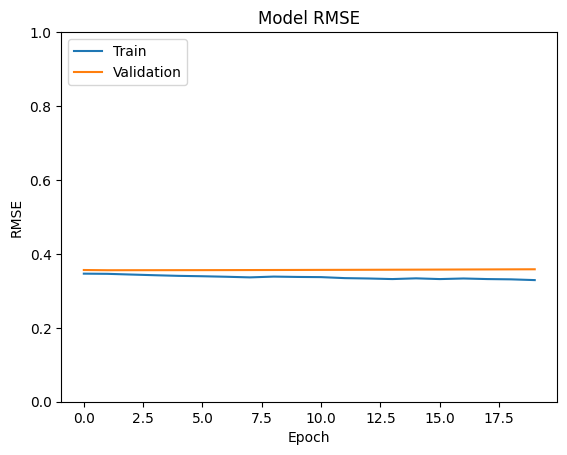

In [69]:
# Plot RMSE (Root Mean Squared Error) selama pelatihan
plt.plot(history.history['root_mean_squared_error'])  # Menampilkan RMSE pada data training
plt.plot(history.history['val_root_mean_squared_error'])  # Menampilkan RMSE pada data validasi

# Memberikan judul pada plot
plt.title('Model RMSE')

# Memberikan label untuk sumbu Y (RMSE)
plt.ylabel('RMSE')

# Mengatur batas sumbu Y agar nilai RMSE tetap berada antara 0 dan 1
plt.ylim(0,1)

# Memberikan label untuk sumbu X (Epoch)
plt.xlabel('Epoch')

# Menambahkan legenda untuk membedakan antara hasil RMSE data training dan validasi
plt.legend(['Train', 'Validation'], loc='upper left')

# Menampilkan plot
plt.show()

#### Mendapatkan Rekomendasi

In [70]:
def recommend_by_collaborative_filtering(user_id, model, data, place_encoded_to_place, top_n=10):
    """
    Mengembalikan rekomendasi Collaborative Filtering untuk seorang pengguna berdasarkan model yang telah dilatih.

    Parameters:
    - user_id (int): ID pengguna yang akan direkomendasikan tempat.
    - model (tf.keras.Model): Model Collaborative Filtering yang telah dilatih dan digunakan untuk prediksi rating.
    - data (pd.DataFrame): Dataset yang berisi interaksi pengguna dengan tempat wisata (ratings).
    - place_encoded_to_place (dict): Mapping dari encoded Place ke Place_Id (untuk mengonversi kembali Place yang sudah di-encode).
    - top_n (int, optional): Jumlah rekomendasi yang diinginkan. Default adalah 10.

    Returns:
    - pd.DataFrame: Daftar rekomendasi tempat wisata, berisi nama tempat, kategori, rating, dan deskripsi.
    """

    # Mencari encoded user_id berdasarkan user_to_user_encoded
    user_encoded = user_to_user_encoded.get(user_id)

    # Jika user_id tidak ditemukan, mengembalikan DataFrame kosong
    if user_encoded is None:
        print("User ID tidak ditemukan. Tidak dapat memberikan rekomendasi.")
        return pd.DataFrame()

    # Mendapatkan tempat-tempat yang sudah pernah dikunjungi oleh pengguna
    user_places = data[data['User_Id'] == user_id]['Place_Id'].tolist()

    # Meng-encode ID tempat-tempat yang sudah dikunjungi
    user_places_encoded = [place_to_place_encoded.get(x) for x in user_places]

    # Mengidentifikasi tempat yang belum pernah dikunjungi oleh pengguna
    all_places = set(place_ids)
    places_not_visited = list(all_places - set(user_places))

    # Meng-encode ID tempat yang belum dikunjungi
    places_not_visited_encoded = [place_to_place_encoded.get(x) for x in places_not_visited]

    # Membuat array untuk input model: user_encoded berulang sebanyak jumlah tempat yang belum dikunjungi
    user_array = np.array([user_encoded] * len(places_not_visited_encoded))
    place_array = np.array(places_not_visited_encoded)

    # Menggunakan model untuk memprediksi rating yang diberikan oleh pengguna terhadap tempat yang belum dikunjungi
    predictions = model.predict(np.vstack([user_array, place_array]).T).flatten()

    # Mengurutkan prediksi rating dari yang tertinggi dan memilih top_n rekomendasi
    top_indices = predictions.argsort()[-top_n:][::-1]

    # Mendapatkan Place_Id dari tempat yang direkomendasikan
    recommended_place_ids = [place_encoded_to_place.get(places_not_visited_encoded[i]) for i in top_indices]

    # Mengambil informasi detail destinasi yang direkomendasikan berdasarkan Place_Id
    recommended_destinations = df_tourism_cleaned[
        df_tourism_cleaned['Place_Id'].isin(recommended_place_ids)
    ][['Place_Name', 'Category', 'Rating', 'Description']].copy()

    # Menambahkan kolom nomor urut untuk kemudahan referensi
    recommended_destinations.reset_index(drop=True, inplace=True)
    recommended_destinations.index += 1  # Menambahkan indeks mulai dari 1
    recommended_destinations.index.name = 'No.'  # Menambahkan label 'No.' di indeks

    return recommended_destinations

In [71]:
# Memilih satu sample User_Id secara acak dari data_collab
user_sample = df_collaborative['User_Id'].sample(1).iloc[0]

# Mendapatkan rekomendasi tempat wisata untuk pengguna yang dipilih dengan Collaborative Filtering
collab_recommendations = recommend_by_collaborative_filtering(
    user_sample,        # User ID yang dipilih secara acak
    model,              # Model Collaborative Filtering yang telah dilatih
    df_collaborative,        # Data yang berisi interaksi pengguna dengan tempat wisata
    place_encoded_to_place,  # Mapping dari encoded Place ke Place_Id
    top_n=10            # Jumlah rekomendasi yang diinginkan (10 rekomendasi)
)

# Menampilkan hasil rekomendasi untuk pengguna yang dipilih
print(f"Rekomendasi berdasarkan Collaborative Filtering untuk User ID {user_sample}:")
display(collab_recommendations)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Rekomendasi berdasarkan Collaborative Filtering untuk User ID 283:


,Place_Name,Category,Rating,Description
No.,,,,
1,Monumen Yogya Kembali,Budaya,4.5,Museum Monumen Yogya Kembali (bahasa Jawa: ꦩꦺꦴ...
2,Bukit Bintang Yogyakarta,Taman Hiburan,4.5,Bukit Bintang merupakan salah satu lokasi nong...
3,Puncak Gunung Api Purba - Nglanggeran,Cagar Alam,4.7,Gunung Nglanggeran adalah sebuah gunung di Dae...
4,Pantai Baron,Bahari,4.4,Pantai Baron adalah salah satu objek wisata be...
5,Pintoe Langit Dahromo,Cagar Alam,4.4,Pintu Langit Dahromo ini menyediakan berbagai ...
6,Teras Cikapundung BBWS,Taman Hiburan,4.3,Teras Cikapundung Bandung sebelumnya merupakan...
7,Glamping Lakeside Rancabali,Taman Hiburan,4.4,Glamping Lakeside Rancabali menawarkan tempat ...
8,Bukit Jamur,Cagar Alam,4.2,Bukit Jamur Ciwidey adalah satu dari sekian ba...
9,Taman Keputran,Taman Hiburan,4.3,"Ntah, mengapa nama taman ini disebut dengan ta..."
